In [1]:
# for database
import sqlite3
import pandas as pd # for dataframe
import numpy as np # analysis
# plotting 
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn import manifold 
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import seaborn as sns

from scipy import stats # significance levels, normality
import itertools # for combinations
import statsmodels.api as sm # anova
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore') # hide matplotlib warnings

In [13]:
games_df = pd.read_csv('Games_hackathon_2020.csv')
player_df = pd.read_csv('Player_hackathon_2020.csv')
players_stats_df = pd.read_csv('Player_Stathackathon_2020.csv')
team_game_df = pd.read_csv('Team_Game.csv')

In [14]:
# Choose one of the following topics: Who has been the best player of the last 10 years?

In [15]:
games_df.head()

,game_code,Date,attendance,season
0,200910270CLE,27/10/2009,20562.0,2009-10
1,200910270DAL,27/10/2009,19871.0,2009-10
2,200910270POR,27/10/2009,20403.0,2009-10
3,200910270LAL,27/10/2009,18997.0,2009-10
4,200910280ATL,28/10/2009,17998.0,2009-10


In [17]:
players_stats_df.head()

,player,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,ast,stl,blk,tov,pf,pts,plus_minus,team,game_code,player_id
0,Al Jefferson,39.050000,7,18,0.389,0,0,NaN,2,2,...,1,1,2,5,2,16,-5.0,Utah Jazz,201211300OKC,2081
1,Mo Williams,31.816667,4,10,0.400,1,4,0.25,4,4,...,6,1,0,3,2,13,-16.0,Utah Jazz,201211300OKC,4640
2,Paul Millsap,31.250000,5,11,0.455,0,0,NaN,3,4,...,2,2,1,3,2,13,-11.0,Utah Jazz,201211300OKC,2925
3,Randy Foye,30.033333,4,9,0.444,4,8,0.50,0,0,...,3,0,0,2,3,12,-15.0,Utah Jazz,201211300OKC,1369
4,DeMarre Carroll,21.000000,2,5,0.400,0,1,0.00,0,0,...,0,2,3,0,3,4,-4.0,Utah Jazz,201211300OKC,673


In [19]:
summed_players_stats = players_stats_df.groupby('player').sum()

In [25]:
fgs = summed_players_stats.sort_values(by=['fg'], ascending = False).iloc[:50]

In [26]:
fgs.head()

,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,...,drb,trb,ast,stl,blk,tov,pf,pts,plus_minus,player_id
player,,,,,,,,,,,,,,,,,,,,,
LeBron James,24403.566667,6438,12111,347.010,960,2706,205.333,3721,5050,471.076,...,4268,5005,4837,1002,470,2335,1131,17557,4446.0,1341600
Kevin Durant,23326.216667,5950,11950,318.045,1306,3406,247.308,4528,5107,549.316,...,4224,4653,2728,695,729,2000,1246,17734,4196.0,720316
LaMarcus Aldridge,23803.016667,5718,11652,327.862,110,374,69.082,2687,3262,503.097,...,4149,5977,1443,520,753,1118,1566,14233,2239.0,28724
Russell Westbrook,23088.750000,5606,12824,289.665,795,2559,174.890,3942,4915,518.727,...,3599,4677,5717,1194,203,2734,1665,15949,3053.0,3000738
Stephen Curry,21354.600000,5073,10640,290.091,2226,5069,263.102,2314,2555,483.991,...,2333,2772,4206,1051,129,1960,1526,14686,4184.0,565800


In [29]:
fgs.info

<bound method DataFrame.info of                              mp    fg    fga   fg_pct   fg3  fg3a  fg3_pct  \
player                                                                       
LeBron James       24403.566667  6438  12111  347.010   960  2706  205.333   
Kevin Durant       23326.216667  5950  11950  318.045  1306  3406  247.308   
LaMarcus Aldridge  23803.016667  5718  11652  327.862   110   374   69.082   
Russell Westbrook  23088.750000  5606  12824  289.665   795  2559  174.890   
Stephen Curry      21354.600000  5073  10640  290.091  2226  5069  263.102   
DeMar DeRozan      23725.933333  4926  10989  302.816   303  1087  102.104   
James Harden       23834.816667  4925  11167  303.994  1810  4942  253.122   
Carmelo Anthony    19852.383333  4755  10779  244.208   950  2649  179.315   
Blake Griffin      19662.716667  4642   9149  284.302   295   868   73.925   
Dwyane Wade        18888.233333  4502   9329  282.547   340  1118  107.589   
Dirk Nowitzki      18840.883333 

No handles with labels found to put in legend.


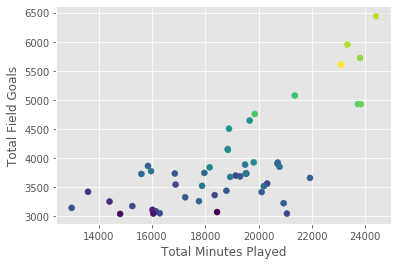

In [31]:
plt.scatter(fgs['mp'], fgs['fg'], c=fgs['fga'])
plt.xlabel('Total Minutes Played')
plt.ylabel('Total Field Goals')
plt.legend()

No handles with labels found to put in legend.


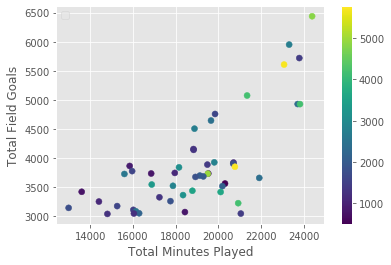

In [35]:
plt.scatter(fgs['mp'], fgs['fg'], c=fgs['ast'])
plt.xlabel('Total Minutes Played')
plt.ylabel('Total Field Goals')
plt.colorbar()
plt.legend()

No handles with labels found to put in legend.


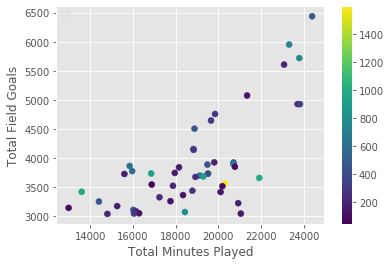

In [38]:
plt.scatter(fgs['mp'], fgs['fg'], c=fgs['blk'])
plt.xlabel('Total Minutes Played')
plt.ylabel('Total Field Goals')
plt.colorbar()
plt.legend()

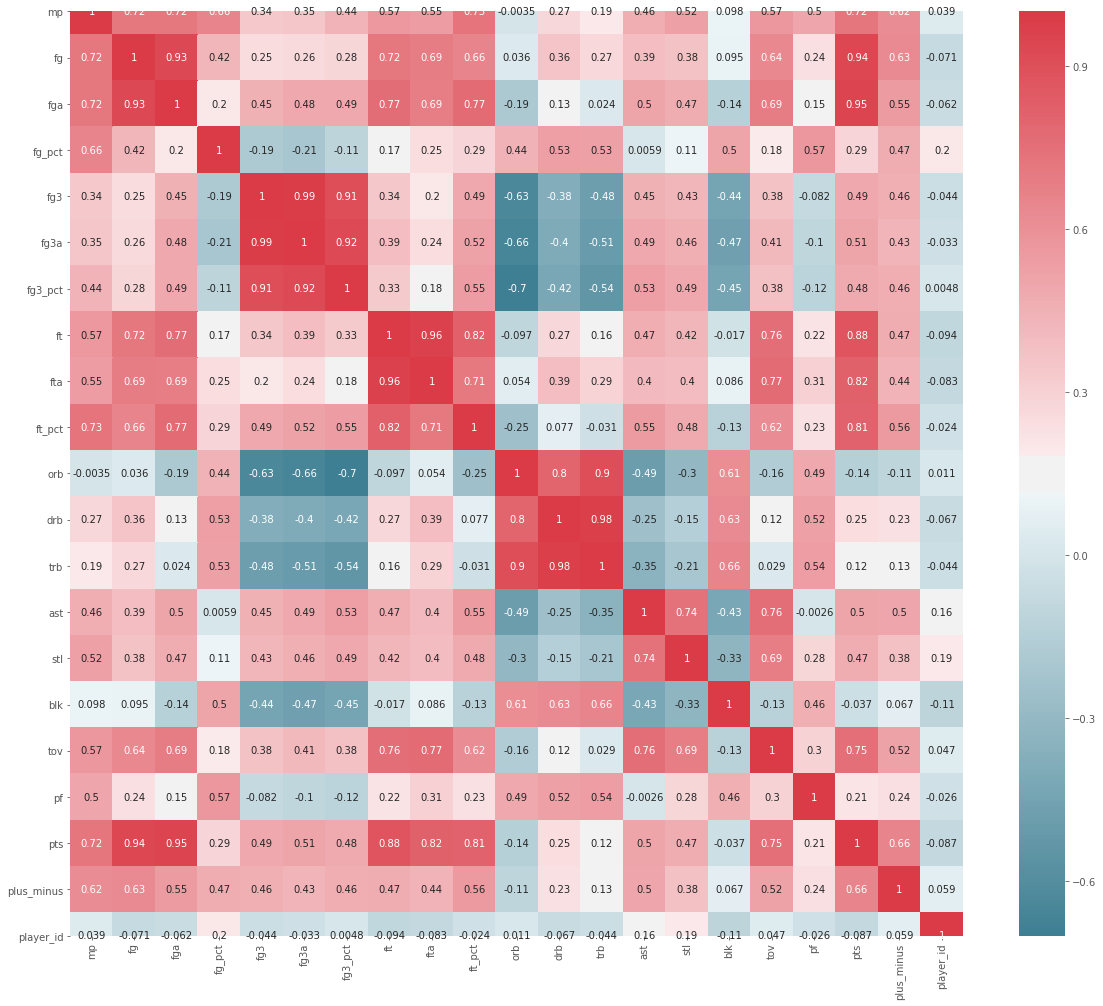

In [42]:
def correlation_heatmap(fgs):
    _,ax=plt.subplots(figsize=(20,17))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(fgs.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(fgs)

In [43]:

print(fgs.corr())

                  mp        fg       fga    fg_pct       fg3      fg3a  \
mp          1.000000  0.719514  0.715224  0.655858  0.340416  0.354204   
fg          0.719514  1.000000  0.929720  0.423246  0.254490  0.261864   
fga         0.715224  0.929720  1.000000  0.198690  0.452497  0.482132   
fg_pct      0.655858  0.423246  0.198690  1.000000 -0.187037 -0.214110   
fg3         0.340416  0.254490  0.452497 -0.187037  1.000000  0.992031   
fg3a        0.354204  0.261864  0.482132 -0.214110  0.992031  1.000000   
fg3_pct     0.440843  0.282086  0.488105 -0.114162  0.905942  0.920515   
ft          0.565054  0.717306  0.766410  0.168549  0.342752  0.391193   
fta         0.545386  0.693176  0.686107  0.245087  0.197478  0.244315   
ft_pct      0.731751  0.658942  0.769027  0.289451  0.490924  0.521789   
orb        -0.003486  0.035811 -0.192295  0.442379 -0.633547 -0.658894   
drb         0.272714  0.358057  0.127438  0.533614 -0.376639 -0.399345   
trb         0.191347  0.265030  0.0242

In [45]:
# Correlation matrix
corr_matrix = fgs.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

to_drop

['fga', 'fg3a', 'fg3_pct', 'fta', 'trb', 'pts']

In [46]:
# Drop features
main_df = fgs.drop(['fga', 'fg3a', 'fg3_pct', 'fta', 'trb', 'pts'], axis = 1)

In [47]:
fgs.info

<bound method DataFrame.info of                              mp    fg    fga   fg_pct   fg3  fg3a  fg3_pct  \
player                                                                       
LeBron James       24403.566667  6438  12111  347.010   960  2706  205.333   
Kevin Durant       23326.216667  5950  11950  318.045  1306  3406  247.308   
LaMarcus Aldridge  23803.016667  5718  11652  327.862   110   374   69.082   
Russell Westbrook  23088.750000  5606  12824  289.665   795  2559  174.890   
Stephen Curry      21354.600000  5073  10640  290.091  2226  5069  263.102   
DeMar DeRozan      23725.933333  4926  10989  302.816   303  1087  102.104   
James Harden       23834.816667  4925  11167  303.994  1810  4942  253.122   
Carmelo Anthony    19852.383333  4755  10779  244.208   950  2649  179.315   
Blake Griffin      19662.716667  4642   9149  284.302   295   868   73.925   
Dwyane Wade        18888.233333  4502   9329  282.547   340  1118  107.589   
Dirk Nowitzki      18840.883333 

In [48]:
import statsmodels.api as sm

In [53]:
## Without a constant


X = fgs['fga']
y = fgs['fg']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     fg   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              8636.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                    9.25e-57
Time:                        20:06:40   Log-Likelihood:                         -355.62
No. Observations:                  50   AIC:                                      713.2
Df Residuals:                      49   BIC:                                      715.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fga            0.4684      0.005     92.929      0.000       0.458       0.479
==============================================================================
Omnibus:                        2.186   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.081
Skew:                           0.471   Prob(JB):                        0.353
Kurtosis:                       2.663   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
## Without a constant


X = fgs['fga']
y = fgs['fg']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     fg   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              8636.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                    9.25e-57
Time:                        20:06:55   Log-Likelihood:                         -355.62
No. Observations:                  50   AIC:                                      713.2
Df Residuals:                      49   BIC:                                      715.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fga            0.4684      0.005     92.929      0.000       0.458       0.479
==============================================================================
Omnibus:                        2.186   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.081
Skew:                           0.471   Prob(JB):                        0.353
Kurtosis:                       2.663   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
plt.style.use('seaborn-darkgrid')
